# Grid illustrations
This notebook plots the reference and perturbed MEDWEST60 horizontal grid and also various other illustrations of the grid size with SST and vorticity

In [1]:
## standart libraries
import os,sys
import numpy as np

from scipy.signal import argrelmax
from scipy.stats import linregress

# xarray
import xarray as xr

# plot
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from matplotlib.colors import Colormap
import matplotlib.colors as mcolors
import matplotlib.dates as mdates
import matplotlib.cm as cm
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from matplotlib.colors import from_levels_and_colors
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import cmocean

# custom tools
import lib_medwest60 as slx

%matplotlib inline 

In [3]:
# output dir 
diro='/mnt/meom/workdir/lerouste/MEDWEST60/DIAGS/'

# Reads e1_ref and perturbed e1t (1%)

In [8]:
diriri = "/mnt/meom/workdir/lerouste/MEDWEST60/MEDWEST60-I/"
varname ='e1t'
e1tref    = xr.open_dataset(diriri+'MEDWEST60_mesh_hgr.nc4')[varname][0,:,:]

varna="e1t"
typ="gridT-2D"
naexp="STD1%"
CONFIGCASE='MEDWEST60-GSL14'
ens='ens01'
machine='CAL1'
nav_lat_ref,nav_lon_ref,mask,e1t,varname,latexvarname=slx.readallmbs(machine=machine,NMBtot=2,typ=typ,varna=varna,CONFIGCASEmed=CONFIGCASE,ens=ens)
e1t.attrs['experiment_short_name'] =  naexp


/mnt/meom/workdir/lerouste/MEDWEST60/MEDWEST60-GSL14-S/ens01/1h/gridT-2D/
001MEDWEST60-GSL14-ens01_1h_*gridT-2D_*.nc
/mnt/meom/workdir/lerouste/MEDWEST60/MEDWEST60-GSL14-S/ens01/1h/gridT-2D/
002MEDWEST60-GSL14-ens01_1h_*gridT-2D_*.nc


In [36]:
e1tref.max()

<xarray.DataArray 'e1t' ()>
array(1521.38427734375)

### Plot e1 ref

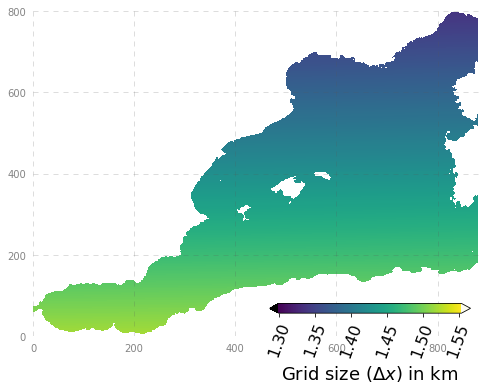

In [12]:
region=[470,620,295,415]
CONFIGCASE='ref'
gstyle='lightstyle'
plto = "slargeviewgrid_e1t_"+varname+"_"+CONFIGCASE+"-"+ens+"_mb002"    
diro='/mnt/meom/workdir/lerouste/MEDWEST60/DIAGS/jun26/grid/'

#### for it in range(0,SSH_el.time_counter.size-1):
#for it in range(10,11,6):
for it in [719]:   
    #====================================
    # data to plot 
    tdate=e1t.time_counter.to_index()[it]
    iday = (it+1)/24.
    tdelta="T0 + "+str('%.2f'%(iday))+" days"
    tformat="%.3f"
    thr=0.4
    
    data2plot = 1e-3*e1tref.where(mask.isel(z=0)>0).squeeze().to_masked_array()

    namo = plto+'_'+str(it)+'.png'


    #========= Plot settings ===============
    levbounds=[1.3,1.555,0.001]


    
    # customed colormap
    cmap,norm   = slx.mycolormap(levbounds,cm_base='viridis',cu='k',co='#FBFBEF')

    #========= PLOT ===============
    fig3,(ax) = plt.subplots(1, 1, figsize=[8, 6],facecolor='w')

    # main plot
    cs,ax = slx.plotmapMEDWEST_gp(fig3,ax,data2plot,cmap,norm,plto=plto,gridpts=True,gridptsgrid=True,gstyle=gstyle)
    #cs2   = ax.pcolormesh(data2plot2,cmap=cmap2,norm=norm2)
    
    lalpha=0.2
    lwidthgrid=1.
    gridinc=200
    lstylegrid=(0, (5, 5))
    if (gstyle=='lightstyle'):
            cmap.set_bad('w')
            lcolorgrid="#585858" # "#D8D8D8"
            tcolorgrid='#848484'#"#848484"            

    #ax = plt.gca()
    ax.xaxis.set_major_locator(mticker.MultipleLocator(gridinc))
    ax.yaxis.set_major_locator(mticker.MultipleLocator(gridinc))   
    ax.tick_params(axis='x', colors=tcolorgrid)
    ax.tick_params(axis='y', colors=tcolorgrid)
    ax.grid(which='major',linestyle=lstylegrid,color=lcolorgrid,alpha=lalpha,linewidth=lwidthgrid)
    ax.axhline(y=1.,xmin=0, xmax=883,zorder=10,color=lcolorgrid,linewidth=lwidthgrid,linestyle=lstylegrid,alpha=lalpha )
    
    # add date
    tcolordate="848484"
    tsizedate=14
    
    plt.axhline(y=350.,xmin=200, xmax=400,zorder=10,color='r',linewidth=3,linestyle='-',alpha=1 )
     
    
    # add colorbar
    cbon=True
    if cbon:
        tlabel="Grid size ($\Delta x$) in km"
        cb,axins1 = slx.addcolorbar(fig3,cs,ax,levbounds,levincr=50,tformat="%.2f",tlabel=tlabel,facmul=1,orientation='horizontal',tc='k')
        cb.ax.tick_params(labelsize=16,color='k') 
        cb.set_label(tlabel,size=18,color='k')
           
    plt.show()
         
    # Save fig in png, resolution dpi    
    slx.saveplt(fig3,diro,namo,dpifig=300)
    

### Plot e1t

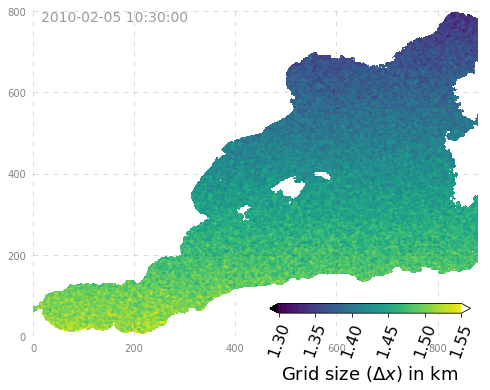

In [13]:
region=[470,620,295,415]
CONFIGCASE='MEDWEST60-GSL14'

gstyle='lightstyle'
plto = "slargeviewgrid_e1t_"+varname+"_"+CONFIGCASE+"-"+ens+"_mb002"    
diro='/mnt/meom/workdir/lerouste/MEDWEST60/DIAGS/jun26/grid/'

#### for it in range(0,SSH_el.time_counter.size-1):
for it in range(10,11,6):
#for it in range(23,1440,12):   
    #====================================
    # data to plot 
    tdate=e1t.time_counter.to_index()[it]
    iday = (it+1)/24.
    tdelta="T0 + "+str('%.2f'%(iday))+" days"
    tformat="%.3f"
    thr=0.4
    
    data2plot = 1e-3*e1t.isel(time_counter=it,e=1).where(mask.isel(z=0)>0).squeeze().to_masked_array()

    
    
    namo = plto+'_'+str(it)+'.png'

    #========= Plot settings ===============
    levbounds=[1.30,1.555,0.005]
    
    # customed colormap
    cmap,norm   = slx.mycolormap(levbounds,cm_base='viridis',cu='k',co='#FBFBEF')

    #========= PLOT ===============
    fig3,(ax) = plt.subplots(1, 1, figsize=[8, 6],facecolor='w')

    # main plot
    cs,ax = slx.plotmapMEDWEST_gp(fig3,ax,data2plot,cmap,norm,plto=plto,gridpts=True,gridptsgrid=True,gstyle=gstyle)

    
    lalpha=0.2
    lwidthgrid=1.
    gridinc=200
    lstylegrid=(0, (5, 5))
    if (gstyle=='lightstyle'):
            cmap.set_bad('w')
            lcolorgrid="#585858" # "#D8D8D8"
            tcolorgrid='#848484'#"#848484"            

    #ax = plt.gca()
    ax.xaxis.set_major_locator(mticker.MultipleLocator(gridinc))
    ax.yaxis.set_major_locator(mticker.MultipleLocator(gridinc))   
    ax.tick_params(axis='x', colors=tcolorgrid)
    ax.tick_params(axis='y', colors=tcolorgrid)
    ax.grid(which='major',linestyle=lstylegrid,color=lcolorgrid,alpha=lalpha,linewidth=lwidthgrid)
    ax.axhline(y=1.,xmin=0, xmax=883,zorder=10,color=lcolorgrid,linewidth=lwidthgrid,linestyle=lstylegrid,alpha=lalpha )
    
    # add date
    tcolordate="848484"
    tsizedate=14
    
    ax.annotate(tdate,xy=(15,775),xycoords='data', color=tcolordate,size=tsizedate)
    plt.axhline(y=350.,xmin=200, xmax=400,zorder=10,color='r',linewidth=3,linestyle='-',alpha=1 )
    #plt.annotate(tdelta,xy=(15,750),xycoords='data', color=tcolordate,size=tsizedate)
    #plt.annotate(tdelta,xy=(10,730),xycoords='data', color=tcolordate,size=23)
       
    
    # add colorbar
    cbon=True
    if cbon:
        tlabel="Grid size ($\Delta x$) in km"
        cb,axins1 = slx.addcolorbar(fig3,cs,ax,levbounds,levincr=10,tformat="%.2f",tlabel=tlabel,facmul=1,orientation='horizontal',tc='k')
        cb.ax.tick_params(labelsize=16,color='k') 
        cb.set_label(tlabel,size=18,color='k')
        
    plt.show()
         
    # Save fig in png, resolution dpi    
    slx.saveplt(fig3,diro,namo,dpifig=300)
    

# Other illustrations of the grid with SST and vorticity

In [5]:
varna="sosstsst"
typ="gridT-2D"
naexp="NO"
CONFIGCASE='MEDWEST60-GSL19'
ens='ens01'
machine='CAL1'
nav_lat_ref,nav_lon_ref,mask,sst,varname,latexvarname=slx.readallmbs(machine=machine,NMBtot=2,typ=typ,varna=varna,CONFIGCASEmed=CONFIGCASE,ens=ens)
sst.attrs['experiment_short_name'] =  naexp


/mnt/meom/workdir/lerouste/MEDWEST60/MEDWEST60-GSL19-S/ens01/1h/gridT-2D/
001MEDWEST60-GSL19-ens01_1h_*gridT-2D_*.nc
/mnt/meom/workdir/lerouste/MEDWEST60/MEDWEST60-GSL19-S/ens01/1h/gridT-2D/
002MEDWEST60-GSL19-ens01_1h_*gridT-2D_*.nc


### SST plot zoomed on the balearic islands with grid shown

719


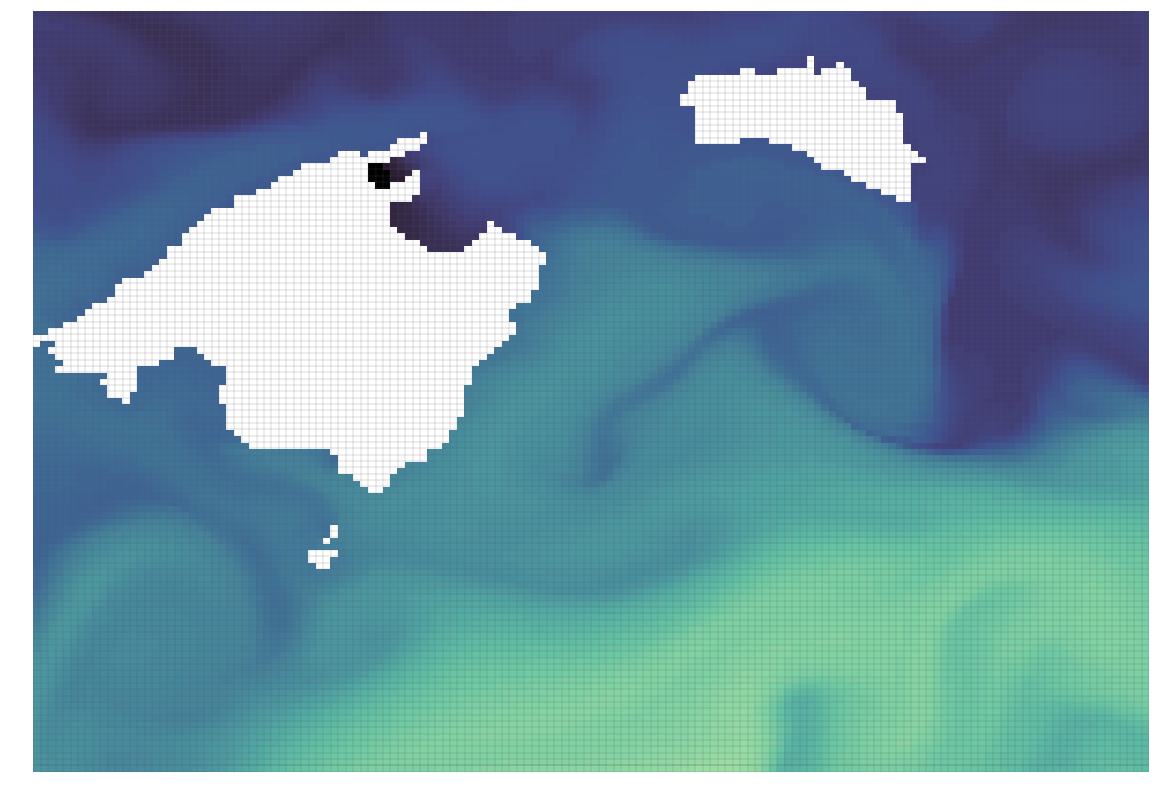

In [6]:
ie=0
region=[470,620,295,415]
#region=[470,720,115,365]
gstyle='lightstyle'
plto = 'gridzoomr_col_'+varname+"_"+CONFIGCASE+"-"+ens+"_mb00"+str(ie+1)    
diro='/mnt/meom/workdir/lerouste/MEDWEST60/DIAGS/jun26/grid/'

maskreg = mask.isel(z=0,x=slice(region[0],region[1]),y=slice(region[2],region[3])).load()
sstreg = sst.isel(e=ie,x=slice(region[0],region[1]),y=slice(region[2],region[3]))

#### for it in range(0,SSH_el.time_counter.size-1):
#for it in range(10,11,6):

#for it in range(0,24*10,3):
for it in range(719,720,24*5): 
    print(it)
    #====================================
    # data to plot 
    tdate=sst.time_counter.to_index()[it]
    iday = (it+1)/24.
    tdelta="T0 + "+str('%.2f'%(iday))+" days"
    tformat="%.3f"
    thr=0.4
    
    data2plot = sstreg.isel(time_counter=it).where(maskreg).squeeze().to_masked_array()
    
    
    
    namo =plto+'_'+str(it)+'.png'


    #========= Plot settings ===============
    levbounds=[13.7,16.1,0.02]
 
    
    # customed colormap
    
    cmap,norm   = slx.mycolormap(levbounds,cm_base=cmocean.cm.deep_r,cu='k',co='#FBFBEF')
   
    #========= PLOT ===============
    fig3,(ax) = plt.subplots(1, 1, figsize=[20, 14],facecolor='w')

    # main plot
    cs,ax = slx.plotmapMEDWEST_gp(fig3,ax,data2plot,cmap,norm,plto=plto,gridpts=True,gridptsgrid=True,gstyle=gstyle)
    
    lalpha=0.7
    lwidthgrid=0.3
    gridinc=1
    lstylegrid='-' #(0, (5, 5))
    if (gstyle=='lightstyle'):
            cmap.set_bad('w')
            lcolorgrid="#585858" # "#D8D8D8"
            tcolorgrid='#848484'#"#848484"            

    #ax = plt.gca()
    ax.xaxis.set_major_locator(mticker.MultipleLocator(gridinc))
    ax.yaxis.set_major_locator(mticker.MultipleLocator(gridinc))   
    ax.tick_params(axis='x', colors='w')
    ax.tick_params(axis='y', colors='w')
    ax.grid(which='major',linestyle=lstylegrid,color=lcolorgrid,alpha=lalpha,linewidth=lwidthgrid)
    ax.axhline(y=1.,xmin=0, xmax=883,zorder=10,color=lcolorgrid,linewidth=lwidthgrid,linestyle=lstylegrid,alpha=lalpha )

    
       
    
    # add colorbar
    cbon=False
    if cbon: 
        tlabel=latexvarname+slx.textunit(varname)
        cb = slx.addcolorbar(fig3,cs,ax,levbounds,levincr=10,tformat="%.2f",tlabel=tlabel,facmul=1,orientation='horizontal',tc='k')
        
        
    showzoom=False
    if showzoom:
        region=region4
        xbox=[region[0],region[0],region[1],region[1],region[0]]
        ybox=[region[2],region[3],region[3],region[2],region[2]]
        ax.plot(xbox, ybox, color="k", alpha=1,linewidth=3, linestyle="-",solid_capstyle='round', zorder=2)
        ax.annotate("zoom 0",xy=(460,485),xycoords='data', color="#DF3A01",size=12)

    
  
    plt.show()
         
    # Save fig in png, resolution dpi    
    slx.saveplt(fig3,diro,namo,dpifig=300)
    

### all domain

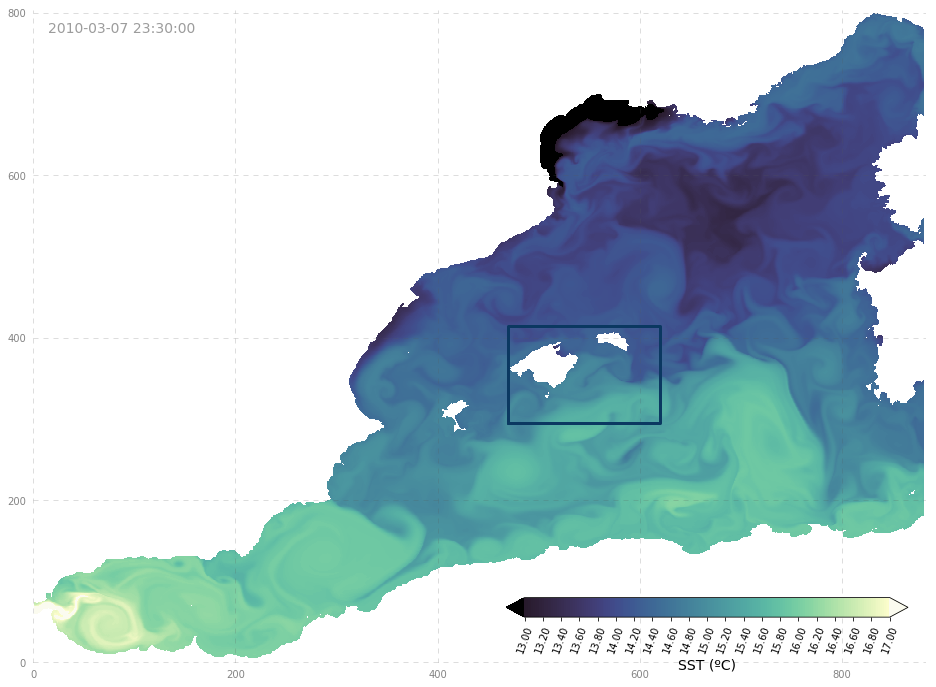

In [52]:
region=[470,620,295,415]

gstyle='lightstyle'
plto = "largeviewgrid_col_"+varname+"_"+CONFIGCASE+"-"+ens+"_mb002"    
diro='/mnt/meom/workdir/lerouste/MEDWEST60/DIAGS/jun26/grid/'

#### for it in range(0,SSH_el.time_counter.size-1):
#for it in range(10,11,6):
for it in [719]:   
    #====================================
    # data to plot 
    tdate=sst.time_counter.to_index()[it]
    iday = (it+1)/24.
    tdelta="T0 + "+str('%.2f'%(iday))+" days"
    tformat="%.3f"
    thr=0.4
    
    data2plot = sst.isel(time_counter=it,e=0).where(mask.isel(z=0)>0).squeeze().to_masked_array()
    
    
    
    
    namo = plto+'_'+str(it)+'.png'


    #========= Plot settings ===============
    levbounds=[13.,17.02,0.02]
    
    # customed colormap
    
    cmap,norm   = slx.mycolormap(levbounds,cm_base=cmocean.cm.deep_r,cu='k',co='#FBFBEF')

    #========= PLOT ===============
    fig3,(ax) = plt.subplots(1, 1, figsize=[16, 12],facecolor='w')

    # main plot
    cs,ax = slx.plotmapMEDWEST_gp(fig3,ax,data2plot,cmap,norm,plto=plto,gridpts=True,gridptsgrid=True,gstyle=gstyle)
    
    lalpha=0.2
    lwidthgrid=1.
    gridinc=200
    lstylegrid=(0, (5, 5))
    if (gstyle=='lightstyle'):
            cmap.set_bad('w')
            lcolorgrid="#585858" # "#D8D8D8"
            tcolorgrid='#848484'#"#848484"            

    #ax = plt.gca()
    ax.xaxis.set_major_locator(mticker.MultipleLocator(gridinc))
    ax.yaxis.set_major_locator(mticker.MultipleLocator(gridinc))   
    ax.tick_params(axis='x', colors=tcolorgrid)
    ax.tick_params(axis='y', colors=tcolorgrid)
    ax.grid(which='major',linestyle=lstylegrid,color=lcolorgrid,alpha=lalpha,linewidth=lwidthgrid)
    ax.axhline(y=1.,xmin=0, xmax=883,zorder=10,color=lcolorgrid,linewidth=lwidthgrid,linestyle=lstylegrid,alpha=lalpha )
    
    # add date
    tcolordate="848484"
    tsizedate=14
    
    ax.annotate(tdate,xy=(15,775),xycoords='data', color=tcolordate,size=tsizedate)
    plt.axhline(y=350.,xmin=200, xmax=400,zorder=10,color='r',linewidth=3,linestyle='-',alpha=1 )
       
    
    # add colorbar
    cbon=True
    if cbon:
        tlabel=latexvarname+slx.textunit(varname)
        cb = slx.addcolorbar(fig3,cs,ax,levbounds,levincr=10,tformat="%.2f",tlabel=tlabel,facmul=1,orientation='horizontal',tc='k')
        
        
    showzoom=True
    if showzoom:
        #region=region4
        xbox=[region[0],region[0],region[1],region[1],region[0]]
        ybox=[region[2],region[3],region[3],region[2],region[2]]
        ax.plot(xbox, ybox, color="#0B3861", alpha=1,linewidth=3, linestyle="-",solid_capstyle='round', zorder=2)

    plt.show()
         
    # Save fig in png, resolution dpi    
    slx.saveplt(fig3,diro,namo,dpifig=300)
    

# vorticite

In [7]:
varna="socurloverf"
typ="curloverf-2D"
naexp="NO%"
CONFIGCASE='MEDWEST60-GSL19'
ens='ens01'
machine='CAL1'
nav_lat_ref,nav_lon_ref,mask,curl,varname,latexvarname=slx.readallmbs(machine=machine,NMBtot=2,typ=typ,varna=varna,CONFIGCASEmed=CONFIGCASE,ens=ens)
curl.attrs['experiment_short_name'] =  naexp


/mnt/meom/workdir/lerouste/MEDWEST60/MEDWEST60-GSL19-S/ens01/1h/curloverf-2D/
001MEDWEST60-GSL19-ens01_1h_*curloverf-2D_*.nc
/mnt/meom/workdir/lerouste/MEDWEST60/MEDWEST60-GSL19-S/ens01/1h/curloverf-2D/
002MEDWEST60-GSL19-ens01_1h_*curloverf-2D_*.nc


### same zoom as above with vorticity and grid shown

719


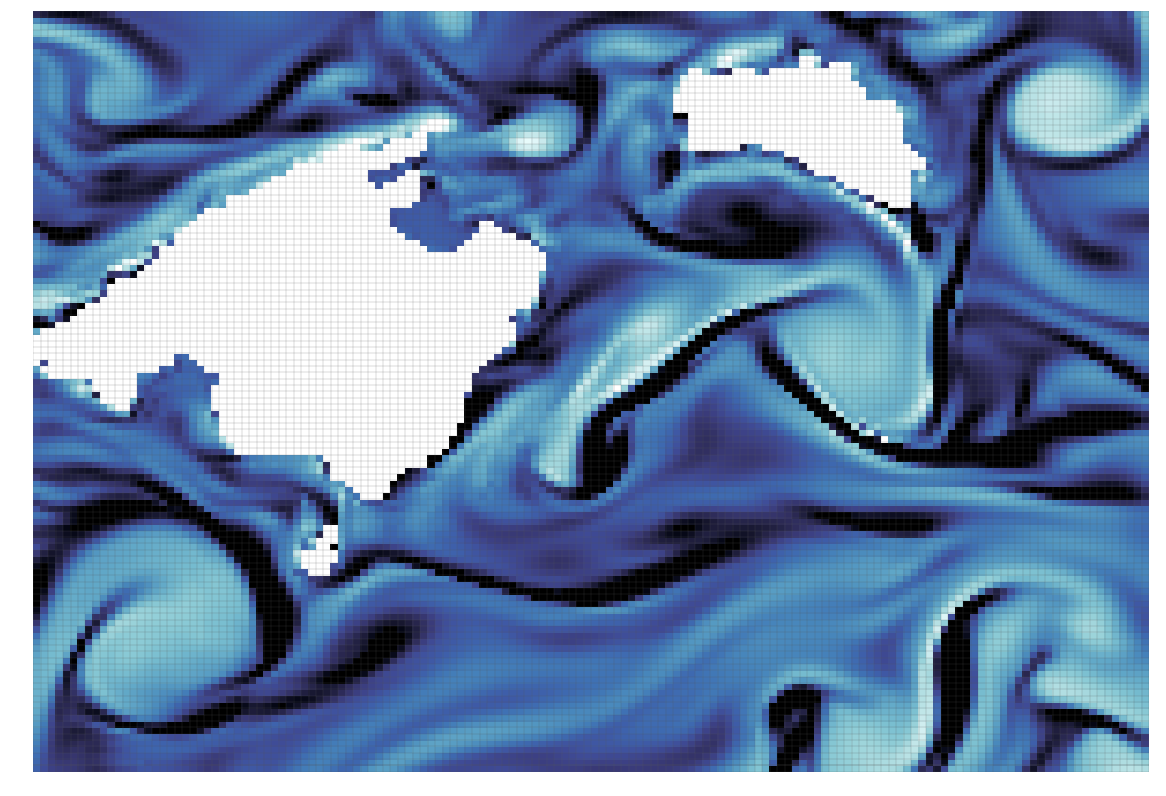

In [13]:
ie=0
region=[470,620,295,415]
#region=[470,720,115,365]
gstyle='lightstyle'
plto = 'gridzoomr_'+varname+"_"+CONFIGCASE+"-"+ens+"_mb00"+str(ie+1)    
diro='/mnt/meom/workdir/lerouste/MEDWEST60/DIAGS/jun26/grid/'

maskreg = mask.isel(z=0,x=slice(region[0],region[1]),y=slice(region[2],region[3])).load()
sstreg = curl.isel(e=ie,x=slice(region[0],region[1]),y=slice(region[2],region[3]))

#### for it in range(0,SSH_el.time_counter.size-1):
#for it in range(10,11,6):

#for it in range(0,24*10,3):
for it in [719]:

    #for it in range(719,720,24*5): 
    print(it)
    #====================================
    # data to plot 
    tdate=curl.time_counter.to_index()[it]
    iday = (it+1)/24.
    tdelta="T0 + "+str('%.2f'%(iday))+" days"
    tformat="%.3f"
    thr=0.4
    
    data2plot = sstreg.isel(time_counter=it).where(maskreg).squeeze().to_masked_array()
    
    
    
    namo =plto+'_'+str(it)+'.png'


    #========= Plot settings ===============
    levbounds=[-3,1.91,0.01]
    levbounds2=[0.00002,0.00010,0.000002]

    
    # customed colormap
    
    cmap,norm = slx.mycolormap(levbounds,cm_base=cmocean.cm.ice_r,cu='w',co='k')
    #========= PLOT ===============
    fig3,(ax) = plt.subplots(1, 1, figsize=[20, 14],facecolor='w')

    # main plot
    cs,ax = slx.plotmapMEDWEST_gp(fig3,ax,data2plot,cmap,norm,plto=plto,gridpts=True,gridptsgrid=True,gstyle=gstyle)
    
    lalpha=0.7
    lwidthgrid=0.3
    gridinc=1
    lstylegrid='-' #(0, (5, 5))
    if (gstyle=='lightstyle'):
            cmap.set_bad('w')
            lcolorgrid="#585858" # "#D8D8D8"
            tcolorgrid='#848484'#"#848484"            

    #ax = plt.gca()
    ax.xaxis.set_major_locator(mticker.MultipleLocator(gridinc))
    ax.yaxis.set_major_locator(mticker.MultipleLocator(gridinc))   
    ax.tick_params(axis='x', colors='w')
    ax.tick_params(axis='y', colors='w')
    ax.grid(which='major',linestyle=lstylegrid,color=lcolorgrid,alpha=lalpha,linewidth=lwidthgrid)
    ax.axhline(y=1.,xmin=0, xmax=883,zorder=10,color=lcolorgrid,linewidth=lwidthgrid,linestyle=lstylegrid,alpha=lalpha )

    
       
    
    # add colorbar
    cbon=False
    if cbon: 
        tlabel=latexvarname+slx.textunit(varname)
        cb = slx.addcolorbar(fig3,cs,ax,levbounds,levincr=10,tformat="%.2f",tlabel=tlabel,facmul=1,orientation='horizontal',tc='k')
        
        
    plt.show()
         
    # Save fig in png, resolution dpi    
    slx.saveplt(fig3,diro,namo,dpifig=300)
    